# Линейная классификация

**Для написания данного раздела лекции использовались следующие источники.**

1) [Оценка качества в задачах классификации и регрессии](https://neerc.ifmo.ru/wiki/index.php?title=Оценка_качества_в_задачах_классификации_и_регрессии)

2) [ml-course-hse](https://github.com/esokolov/ml-course-hse/tree/master)

3) [учебник от Яндекса по машинному обучению](https://education.yandex.ru/handbook/ml/)



Теперь давайте обсудим задачу классификации. Для начала рассмотрим бинарную классификацию на два класса. Обобщить эту задачу до классификации на $K$ классов не составит большого труда. Пусть теперь наши целевые переменные $y$ кодируют принадлежность к положительному или отрицательному классу, то есть принадлежность множеству ${-1,1}$ (в этом контексте мы будем использовать именно эти метки для классов, хотя в реальной жизни вы часто встретите метки ${0,1}$). При этом $x$ по-прежнему представляет собой векторы из $\mathbb{R}^D$. Наша цель состоит в том, чтобы обучить линейную модель так, чтобы она максимально точно разделяла объекты одного класса от другого.

Давайте обозначим:

* $X = \mathbb{R}^d$ --- пространство объектов,
* $Y = \{-1, +1\}$ --- множество допустимых ответов,
* $X = {(x_i, y_i)}_{i = 1}^\ell$ -- обучающая выборка.
Иногда мы будем называть класс <<$+1$>> положительным, а класс <<$-1$>> отрицательным.


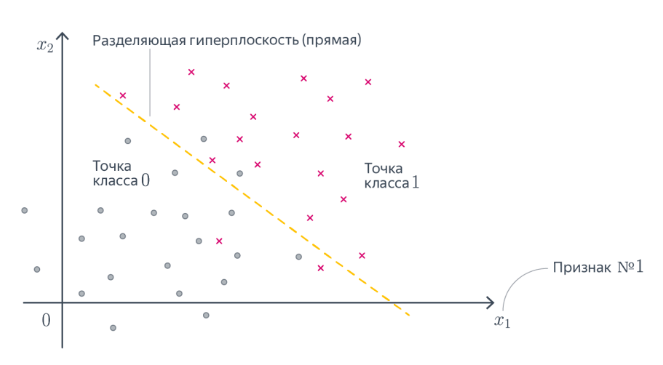

В идеальной ситуации найдётся плоскость, которая разделит классы: положительный окажется с одной стороны от неё, а отрицательный с другой. Выборка, для которой это возможно, называется линейно разделимой. Увы, в реальной жизни такое встречается крайне редко.

Как обучить линейную модель классификации, нам ещё предстоит понять, но уже ясно, что итоговое предсказание можно будет вычислить по формуле


$$y = a(x)  = \text{sign} \langle w, x_i\rangle=
sign \left(
        \sum_{j = 1}^{d} w_j x_j + w_0
\right)$$

где $w \in R^d$ --- вектор весов, $w_0 \in R$ -- сдвиг (bias).
Заметим, что функция $sign(z)$ может выдавать ноль при~$z = 0$,
но в множество ответов ноль не входит.
Во-первых, можем понадеяться, что нулевое значение линейной модели -- настолько
редкое событие, что нам не придётся иметь с этим дело.
Во-вторых, можем считать, что если модель выдала ноль, то она не может выбрать класс
и отказывается от классификации -- что-то вроде выдачи исключения.

Если не сказано иначе, мы будем считать, что среди признаков
есть константа, $x_{d + 1} = 1$.
В этом случае нет необходимости вводить сдвиг~$w_0$,
и линейный классификатор можно задавать как
$$
y = a(x) = sign \langle w, x \rangle.
$$


## Почему бы не решать, как задачу регрессии?
Мы можем попробовать предсказывать числа
 -1 и 1, минимизируя для этого, например, MSE с последующим взятием знака, но ничего хорошего не получится. Во-первых, регрессия почти не штрафует за ошибки на объектах, которые лежат близко к *разделяющей плоскости*, но не с той стороны. Во вторых, ошибкой будет считаться предсказание, например, 5
 вместо 1
, хотя нам-то на самом деле не важно, какой у числа модуль, лишь бы знак был правильным. Если визуализировать такое решение, то проблемы тоже вполне заметны:

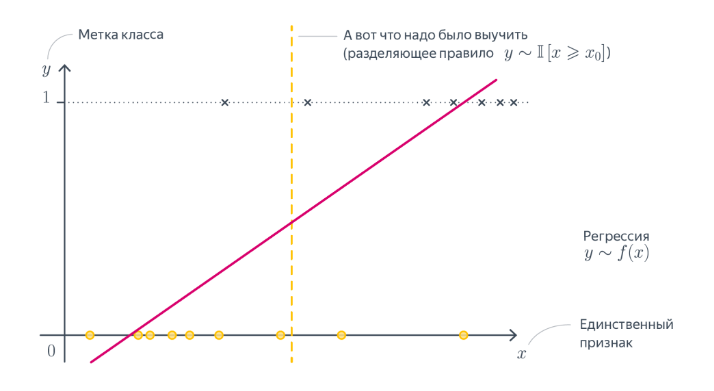

Нам нужна прямая, которая разделяет эти точки, а не проходит через них!

Геометрически линейный классификатор соответствует гиперплоскости с вектором нормали $w$.
Величина скалярного произведения $\langle w, x \rangle$ пропорциональна расстоянию
от гиперплоскости до точки $x$, а его знак показывает, с какой стороны от гиперплоскости находится
данная точка.
Таким образом, линейный классификатор разделяет пространство на две части с помощью гиперплоскости,
и при этом одно полупространство относит к положительному классу, а другое -- к отрицательному.


Это  означает, что строится разделяющая гиперплоскость, которая разделяет классы. Например, если у нас есть 2 признака, то строится прямая, а если у нас есть 3 признака, то строится гиперплоскость в трехмерном пространстве.




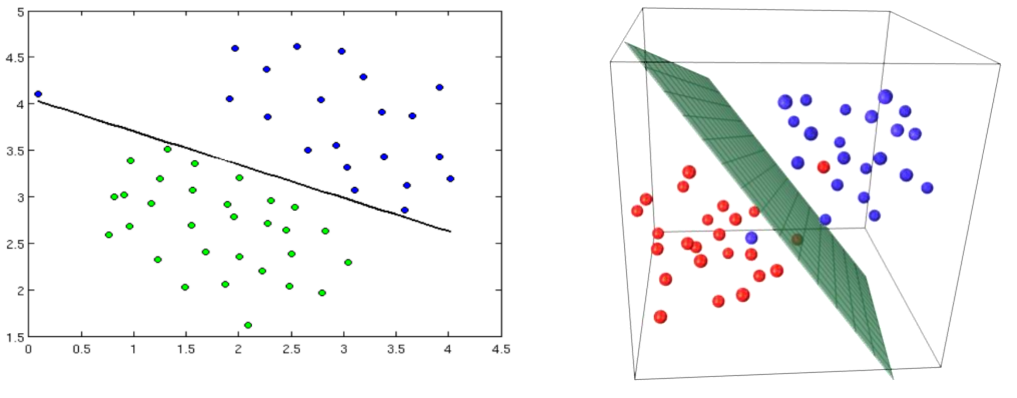

## Обучение линейных классификаторов
В задаче регрессии имеется континуум возможных ответов, и при таких условиях
достаточно странно требовать полного совпадения ответов модели и истинных ответов гораздо логичнее говорить об их близости.
Более того, как мы выяснили, попытка провести функцию через все обучающие точки
легко может привести к переобучению.
Способов посчитать близость двух чисел (прогноза и истинного ответа) достаточно много, и поэтому при обсуждении регрессии у нас возникло большое количество функционалов ошибки.

В случае с бинарной классификацией всё гораздо проще: у нас всего два возможных ответа алгоритма и,
очевидно, мы хотим видеть как можно больше правильных ответов.
Соответствующий функционал называется **долей правильных ответов** (accuracy):
$$
    Q(a, X)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        [a(x_i) = y_i].
$$

где $a(x_i)$ - ответ алгоритма на объекте $x_i$, $y_i$ - истинная метка класса для объекта $x_i$, а $\ell$ - количество объектов в выборке $X$.


Нам будет удобнее решать задачу минимизации, поэтому будем вместо этого использовать долю неправильных ответов:
$$
    Q(a, X)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        [a(x_i) \neq y_i]
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        [sign \langle w, x_i \rangle \neq y_i]
    \to
    \min_w \qquad (2)
$$
Этот функционал является дискретным относительно весов, и поэтому искать его минимум
с помощью градиентных методов мы не сможем.
Более того, у данного функционала может быть много глобальных минимумов
вполне может оказаться, что существует много способов добиться оптимального количества ошибок.
Чтобы не пытаться решать все эти проблемы, попытаемся свести задачу к минимизации гладкого функционала.


## Отступы.
Заметим, что функционал (2) можно несколько видоизменить:
$$
    Q(a, X)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        [\underbrace{y_i \langle w, x_i \rangle}_{M_i} < 0]=\frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        [{M_i} < 0]
    \to
    \min_w
$$
Здесь возникла очень важная величина $M_i = y_i \langle w, x_i \rangle$,
называемая **отступом** (margin).
Знак отступа говорит о корректности ответа классификатора (положительный отступ соответствует
правильному ответу, отрицательный  неправильному), а его абсолютная величина характеризует
степень уверенности классификатора в своём ответе.
Напомним, что скалярное произведение $\langle w, x \rangle$ пропорционально расстоянию
от разделяющей гиперплоскости до объекта;
соответственно, чем ближе отступ к нулю, тем ближе объект к границе классов,
тем ниже уверенность в его принадлежности.

Предположим, у нас есть два класса объектов, которые мы пытаемся классифицировать с помощью линейного классификатора. Разделяющая гиперплоскость задается уравнением $ \langle w, x \rangle + b = 0 $, где $ w $ - вектор весов, $ x $ - входные признаки объекта, а $ b$ - смещение.

Пусть у нас есть объект с признаками $ x = [2, 3] $ и истинным классом $ y = 1 $. Если вектор весов $ w = [1, 1] $ и смещение $ b = -4 $, то мы можем вычислить отступ следующим образом:
$$ M = y \cdot (\langle w, x \rangle + b) = 1 \cdot (1 \cdot 2 + 1 \cdot 3 - 4) = 1 $$

В этом случае у нас положительный отступ $ M = 1$, что указывает на то, что объект находится далеко du разделяющей гиперплоскости и классификатор уверен в правильности классификации этого объекта.

Код  на питон:

In [ ]:
import numpy as np

# Заданные данные
x = np.array([2, 3])  # входные признаки объекта
y = 1  # истинный класс объекта
w = np.array([1, 1])  # вектор весов
b = -4  # смещение

# Вычисление отступа
M = y * (np.dot(w, x) + b)
print("Отступ M для данного объекта:", M)

Отступ M для данного объекта: 1


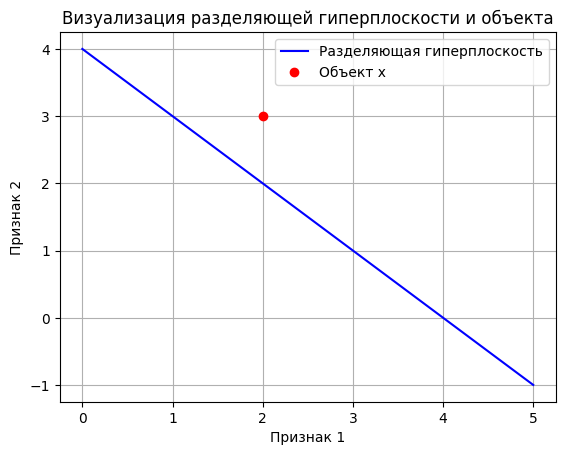

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Заданные данные
x = np.array([2, 3])  # входные признаки объекта
w = np.array([1, 1])  # вектор весов
b = -4  # смещение

# Уравнение разделяющей гиперплоскости: w1*x1 + w2*x2 + b = 0
# Выразим x2 через x1: x2 = (-w1*x1 - b) / w2
x1 = np.linspace(0, 5, 100)
x2 = (-w[0]*x1 - b) / w[1]

# Визуализация разделяющей гиперплоскости и объекта
plt.plot(x1, x2, 'b-', label='Разделяющая гиперплоскость')
plt.plot(x[0], x[1], 'ro', label='Объект x')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Визуализация разделяющей гиперплоскости и объекта')
plt.legend()
plt.grid(True)
plt.show()

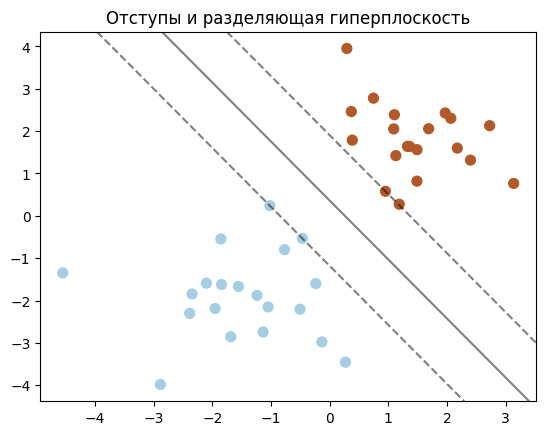

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Создадим данные для двух классов
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
y = [-1] * 20 + [1] * 20

# Обучим линейный классификатор
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1)
clf.fit(X, y)

# Визуализация разделяющей гиперплоскости и отступов
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', s=50)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Создадим сетку для вычисления значений отступа
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Визуализируем отступы
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title('Отступы и разделяющая гиперплоскость')
plt.show()

##Верхние оценки.
Функционал (2) оценивает ошибку алгоритма на объекте$x$
с помощью пороговой функции потерь $L(M) = [M < 0]$,
где аргументом функции является отступ $M = y \langle w, x \rangle$.
Оценим эту функцию сверху во всех точках $M$ кроме, может быть, небольшой полуокрестности левее нуля (см. рис. ниже
$$
    L(M) \leq \tilde L(M).
$$
После этого можно получить верхнюю оценку на функционал~\eqref{eq:errCnt}:
$$
    Q(a, X)
    \leq
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \tilde L(y_i \langle w, x_i \rangle)
    \to
    \min_w
$$
Если верхняя оценка $\tilde L(M)$ является гладкой, то и данная верхняя оценка будет гладкой.
В этом случае её можно будет минимизировать с помощью, например, градиентного спуска.
Если верхнюю оценку удастся приблизить к нулю, то и доля неправильных ответов тоже будет близка к нулю.


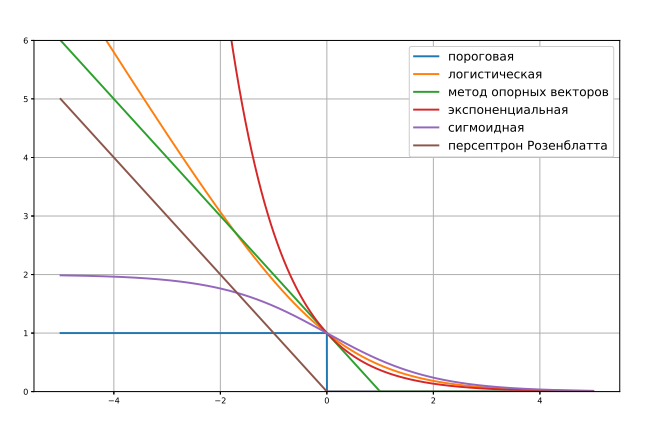

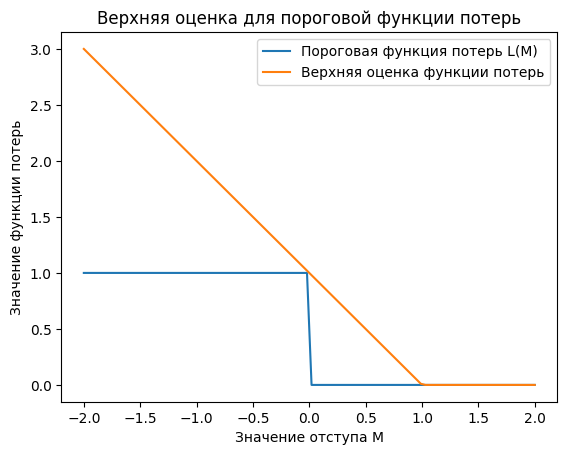

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Определим пороговую функцию потерь L(M) = [M < 0]
def threshold_loss(M):
    return int(M < 0)

# Определим верхнюю оценку для пороговой функции потерь
def upper_bound_loss(M):
    return np.maximum(0, 1 - M)

# Создадим массив значений отступа M
M_values = np.linspace(-2, 2, 100)

# Вычислим значения функций потерь для этих значений отступа
L_values = np.array([threshold_loss(M) for M in M_values])
upper_L_values = upper_bound_loss(M_values)

# Построим графики функций
plt.plot(M_values, L_values, label='Пороговая функция потерь L(M)')
plt.plot(M_values, upper_L_values, label='Верхняя оценка функции потерь')
plt.xlabel('Значение отступа M')
plt.ylabel('Значение функции потерь')
plt.title('Верхняя оценка для пороговой функции потерь')
plt.legend()
plt.show()


Приведём несколько примеров верхних оценок:

- $\tilde L(M) = \log \left(1 + e^{-M} \right)$ --  логистическая функция потерь
- $\tilde L(M) = (1 - M)_+ = \max(0, 1 - M)$  -- кусочно-линейная функция потерь~(используется в методе опорных векторов)
- $\tilde L(M) = (-M)_+ = \max(0, -M)$ -- кусочно-линейная функция потерь (соответствует персептрону Розенблатта)
- $\tilde L(M) = e^{-M}$ -- экспоненциальная функция потерь
- $\tilde L(M) = 2/(1 + e^M)$ -- сигмоидная функция потерь

Любая из них подойдёт для обучения линейного классификатора.
Позже мы подробно изучим некоторые из них и выясним, какими свойствами они обладают.


### Метрики качества классификации
Выше мы разобрали способ сведения задачи обучения линейного классификатора
к минимизации гладкого функционала.
При этом часто возникает необходимость в изучении различных аспектов качества
уже обученного классификатора.
Обсудим подробнее распространённые подходы к измерению качества таких моделей.

Будем считать, что классификатор имеет вид $a(x) = sign(b(x) - t) = 2 [b(x) > t] - 1$.

> Очевидно, что если $b(x) > t$, то $b(x) - t$ будет положительным, и $sign(b(x) - t)$ вернет 1. Если же $b(x) \leq t$, то $b(x) - t$ будет отрицательным, и $sign(b(x) - t)$ вернет -1.
Таким образом, мы можем записать $sign(b(x) - t)$ в виде $2 [b(x) > t] - 1$, что позволяет нам явно увидеть процесс классификации на два класса в зависимости от значения $b(x)$ относительно порогового значения $t$.

Линейная модель имеет именно такую форму, если положить $b(x) = \langle w, x \rangle$ и $t = 0$.





## Доля правильных ответов
Наиболее очевидной мерой качества в задаче классификации является доля правильных ответов (accuracy),
которую мы уже упоминали:
$$
    \text{accuracy}(a, x)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell} [a(x_i) = y_i].
$$
Данная метрика, однако, имеет существенный недостаток.
Если взять порог $t$ меньше минимального значения прогноза $b(x)$ на выборке
или больше максимального значения, то доля правильных ответов будет равна
доле положительных и отрицательных ответов соответственно.
Таким образом, если в выборке $950$ отрицательных
и $50$ положительных объектов, то при тривиальном пороге $t = \max_i b(x_i)$
мы получим долю правильных ответов $0.95$.
Это означает, что доля положительных ответов сама по себе
не несет никакой информации о качестве работы алгоритма $a(x)$,
и вместе с ней следует анализировать соотношение классов в выборке.
Также полезно вместе с долей правильных ответов вычислять **базовую долю** --
долю правильных ответов алгоритма, всегда выдающего наиболее мощный класс.

Отметим, что при сравнении различных методов машинного обучения
принято сообщать относительное уменьшение ошибки.
Рассмотрим два алгоритма $a_1$ и $a_2$ с долями правильных ответов $r_1$ и $r_2$
соответственно, причем $r_2 > r_1$.
Относительным уменьшением ошибки алгоритма $a_2$ называется величина
$$
    \frac{
        (1 - r_1) - (1 - r_2)
    }{
        1 - r_1
    }.
$$
Если доля ошибок была улучшена с $20\%$ до $10\%$,
то относительное улучшение составляет $50\%$.
Если доля ошибок была улучшена с $50\%$ до $25\%$,
то относительное улучшение также равно $50\%$,
хотя данный прирост кажется более существенным.
Если же доля ошибок была улучшена с $0.1\%$ до $0.01\%$,
то относительное улучшение составляет $90\%$,
что совершенно не соответствует здравому смыслу.

Это связано с тем, что относительное уменьшение ошибки не учитывает абсолютное изменение в долях ошибок и может давать искаженное представление о реальном улучшении производительности алгоритма, особенно при работе с очень малыми начальными значениями ошибок.

Поэтому при интерпретации относительного уменьшения ошибки важно учитывать контекст и абсолютные значения долей ошибок для корректной оценки улучшения производительности алгоритма.


Для учёта абсолютного изменения в долях ошибок можно рассмотреть следующие подходы:

1. **Абсолютное уменьшение ошибки:** Рассчитайте абсолютное различие между исходной долей ошибок и новой долей ошибок. Например, если доля ошибок уменьшилась с 50% до 25%, абсолютное уменьшение ошибки составит 50% - 25% = 25%.

2. **Графическое представление:** Используйте графики или визуализации для отображения изменения долей ошибок. График может наглядно показать абсолютное и относительное уменьшение ошибки и помочь визуально сравнить изменения.

3. **Контекст задачи:** Важно учитывать контекст конкретной задачи и её требования. Например, в некоторых сферах даже небольшое абсолютное уменьшение ошибки может иметь большое значение, в то время как в других случаях более значительное уменьшение ошибки может быть необходимо.

Учитывание абсолютного изменения в долях ошибок позволяет получить более полное представление о реальном улучшении производительности алгоритма и принять более информированное решение при оценке качества работы алгоритма.



In [ ]:
# Доли правильных ответов для двух алгоритмов
r1 = 0.8  # Доля правильных ответов для алгоритма 1
r2 = 0.9  # Доля правильных ответов для алгоритма 2

# Вычисление относительного уменьшения ошибки
relative_error_reduction = ((1 - r1) - (1 - r2)) / (1 - r1) * 100

print(f"Относительное уменьшение ошибки: {relative_error_reduction:.2f}%")

Относительное уменьшение ошибки: 50.00%


В этом примере мы вычисляем относительное уменьшение ошибки для двух алгоритмов с долями правильных ответов 0.8 и 0.9 соответственно. Результат будет выведен в процентах и покажет, насколько процентов уменьшилась ошибка при переходе от первого алгоритма ко второму.

In [ ]:
# Исходные доли ошибок
error_rate_initial = 0.5  # Исходная доля ошибок
error_rate_final = 0.25  # Новая доля ошибок

# Рассчет абсолютного уменьшения ошибки
absolute_error_reduction = error_rate_initial - error_rate_final

print(f"Абсолютное уменьшение ошибки: {absolute_error_reduction:.2f}")

Абсолютное уменьшение ошибки: 0.25


В этом примере мы рассчитываем абсолютное уменьшение ошибки для случая, когда исходная доля ошибок составляет 50%, а новая доля ошибок составляет 25%. Результат будет выведен и покажет абсолютное уменьшение ошибки в десятичном формате.

### Матрица ошибок (англ. Сonfusion matrix)

Выше мы убедились, что в случае с несбалансированными классами одной доли правильных ответов недостаточно --- необходима еще одна метрика качества.

В данном разделе мы рассмотрим другую, более информативную пару критериев. Введем сначала понятие матрицы ошибок. Это способ разбить объекты на четыре категории в зависимости от комбинации истинного ответа и ответа алгоритма (см. таблицу 1).

Предположим, что у нас есть два класса y={0,1} и алгоритм, предсказывающий принадлежность каждого объекта одному из классов. Рассмотрим пример. Пусть банк использует систему классификации заёмщиков на кредитоспособных и некредитоспособных. При этом первым кредит выдаётся, а вторые получат отказ. Таким образом, обнаружение некредитоспособного заёмщика (y=1) можно рассматривать как "сигнал тревоги", сообщающий о возможных рисках.

Любой реальный классификатор совершает ошибки. В нашем случае таких ошибок может быть две:

1. Кредитоспособный заёмщик распознается моделью как некредитоспособный и ему отказывается в кредите. Данный случай можно трактовать как "ложную тревогу".
2. Некредитоспособный заёмщик распознаётся как кредитоспособный и ему ошибочно выдаётся кредит. Данный случай можно рассматривать как "пропуск цели".

Несложно увидеть, что эти ошибки неравноценны по связанным с ними проблемам. В случае "ложной тревоги" потери банка составят только проценты по невыданному кредиту (только упущенная выгода). В случае "пропуска цели" можно потерять всю сумму выданного кредита. Поэтому системе важнее не допустить "пропуск цели", чем "ложную тревогу".

Поскольку с точки зрения логики задачи нам важнее правильно распознать некредитоспособного заёмщика с меткой y=1, чем ошибиться в распознавании кредитоспособного, будем называть соответствующий исход классификации положительным (заёмщик некредитоспособен), а противоположный - отрицательным (заемщик кредитоспособен y=0). Тогда возможны следующие исходы классификации:

1. Некредитоспособный заёмщик классифицирован как некредитоспособный, т.е. положительный класс распознан как положительный. Наблюдения, для которых это имеет место называются истинно-положительными (True Positive — TP).
2. Кредитоспособный заёмщик классифицирован как кредитоспособный, т.е. отрицательный класс распознан как отрицательный. Наблюдения, которых это имеет место, называются истинно отрицательными (True Negative — TN).
3. Кредитоспособный заёмщик классифицирован как некредитоспособный, т.е. имела место ошибка, в результате которой отрицательный класс был распознан как положительный. Наблюдения, для которых был получен такой исход классификации, называются ложно-положительными (False Positive — FP), а ошибка классификации называется ошибкой I рода.
4. Некредитоспособный заёмщик распознан как кредитоспособный, т.е. имела место ошибка, в результате которой положительный класс был распознан как отрицательный. Наблюдения, для которых был получен такой исход классификации, называются ложно-отрицательными (False Negative — FN), а ошибка классификации называется ошибкой II рода.

Таким образом, ошибка I рода, или ложно-положительный исход классификации, имеет место, когда отрицательное наблюдение распознано моделью как положительное. Ошибкой II рода, или ложно-отрицательным исходом классификации, называют случай, когда положительное наблюдение распознано как отрицательное. Поясним это с помощью матрицы ошибок классификации:

Благодаря матрице ошибок объекты разбиваются на четыре категории в зависимости от комбинации истинного ответа и ответа алгоритма (см. таблицу ниже).

Через элементы  матрицы  ошибок можно, например, выразить долю правильных ответов (англ. Accuracy):
\begin{array}{|c|c|c|}
\hline
& y = 1 & y = -1 \\
\hline
a(x) = 1 & \text{True Positive (TP)} & \text{False Positive (FP)} \\
a(x) = -1 & \text{False Negative (FN)} & \text{True Negative (TN)} \\
\hline
\end{array}

Здесь $a(x)$ — это ответ алгоритма на объекте, а $y$ — истинная метка класса на этом объекте. Таким образом, ошибки классификации бывают двух видов: False Negative (FN) и False Positive (FP). "P" означает, что классификатор определяет класс объекта как положительный, а "N" — отрицательный. "T" означает, что класс предсказан правильно, а "F" — неправильно. Каждая строка в матрице ошибок представляет спрогнозированный класс, а каждый столбец — фактический класс.

**На заметку:**

- TP (True Positive) - истинно положительные ответы
- FP (False Positive) - ложноположительные ответы
- FN (False Negative) - ложноотрицательные ответы
- TN (True Negative) - истинно отрицательные ответы

Рассмотрим  как эти термины соотносятся с медицинским тестом:

- TP (True Positive) - количество пациентов, у которых тест правильно выявил наличие болезни.
- FP (False Positive) - количество пациентов, у которых тест ошибочно показал наличие болезни (ошибка первого рода).
- FN (False Negative) - количество пациентов, у которых тест неправильно показал отсутствие болезни (ошибка второго рода).
- TN (True Negative) - количество пациентов, у которых тест правильно показал отсутствие болезни.

Теперь, давайте представим, что из 100 пациентов, у которых мы провели тест, 25 пациентов имеют болезнь, и тест правильно определил 20 из них. Однако, у 75 здоровых пациентов тест ошибочно показал наличие болезни. Тогда у нас будет:

- TP (True Positive) = 20
- FP (False Positive) = 75
- FN (False Negative) = 5
- TN (True Negative) = 0





### Аккуратность (англ. Accuracy)

Аккуратность представляет собой интуитивно понятную и простую метрику, которая измеряет долю правильных ответов алгоритма и вычисляется по формуле:

$$ \text{accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

Однако эта метрика становится бесполезной в задачах с неравными классами, что можно проиллюстрировать на примере.

Допустим, мы хотим оценить работу спам-фильтра почты. У нас есть 100 не-спам писем, 90 из которых наш классификатор определил верно (True Negative = 90, False Positive = 10), и 10 спам-писем, 5 из которых классификатор также определил верно (True Positive = 5, False Negative = 5). Тогда аккуратность будет равна:

$$\text{accuracy} = \frac{5 + 90}{5 + 90 + 10 + 5} = 86.4\% $$

Однако, если мы просто будем предсказывать все письма как не-спам, то получим более высокую аккуратность:

$$ \text{accuracy} = \frac{0 + 100}{0 + 100 + 100 + 0} = 90.9\% $$

При этом, наша модель совершенно не обладает никакой предсказательной силой, так как изначально мы хотели определять письма со спамом. Преодолеть эту проблему помогает переход от общей для всех классов метрики к отдельным показателям качества классов.




Гораздо более информативными критериями являются **точность** (precision) и **полнота** (recall):
$$
\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}; \quad \text{recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}.
$$

Точность показывает, какая доля объектов, выделенных классификатором как положительные, действительно является положительными. Полнота показывает, какая часть положительных объектов была выделена классификатором.

**Конкретный пример:**
Предположим, у нас есть модель для выявления заболевания, где положительный результат теста означает наличие заболевания, а отрицательный - его отсутствие. Допустим, у нас есть 100 пациентов, из которых 30 действительно болеют (TP = 30), и модель правильно определила 25 из них (TP = 25). Однако, модель также ошибочно определила 20 здоровых пациентов как больных (FP = 20). Тогда точность (precision) будет равна 55.6% (25 / (25 + 20)), что показывает, какая доля пациентов, определенных моделью как больные, действительно болеют.

Полнота (recall) в данном случае будет равна 83.3% (25 / (25 + 5)), что показывает, какая часть действительно больных пациентов была выявлена моделью.

Имея матрицу ошибок, можно легко вычислить точность и полноту для каждого класса. Точность (precision) вычисляется как отношение соответствующего диагонального элемента матрицы к сумме всей строки класса. Полнота (recall) вычисляется как отношение диагонального элемента матрицы к сумме всего столбца класса.

Формально:

Точность (precision) для класса c вычисляется по формуле:
$$
Precision_c = \frac{A_{c,c}}{\sum_{i=1}^{n}A_{c,i}}
$$

Полнота (recall) для класса c вычисляется по формуле:
$$ Recall_c = \frac{A_{c,c}}{\sum_{i=1}^{n}A_{i,c}} $$

  Теперь рассмотрим, например, задачу предсказания реакции клиента банка на звонок с предложением кредита.
Ответ $y = 1$ означает, что клиент возьмет кредит после рекламного звонка,
ответ $y = -1$  что не возьмет.
Соответственно, планируется обзванивать только тех клиентов, для которых
классификатор $a(x)$ вернет ответ $1$.
Если классификатор имеет высокую точность, то практически все клиенты, которым
будет сделано предложение, откликнутся на него.
Если классификатор имеет высокую полноту, то предложение будет сделано практически
всем клиентам, которые готовы откликнуться на него.
Как правило, можно регулировать точность и полноту, изменяя порог $t$
в классификаторе $a(x) = sign(b(x) - t) = 2 [b(x) > t] - 1$.
Если выбрать $t$ большим, то классификатор будет относить к положительному классу
небольшое число объектов, что приведет к высокой точности и низкой полноте.
По мере уменьшения $t$ точность будет падать, а полнота увеличиваться.
Конкретное значение порога выбирается согласно пожеланиям заказчика.

Отметим, что точность и полнота не зависят от соотношения размеров классов.
Даже если объектов положительного класса на порядки меньше,
чем объектов отрицательного класса, данные показатели будут корректно
отражать качество работы алгоритма.

Существует несколько способов получить один критерий качества
на основе точности и полноты.
Один из них - F-мера, гармоническое среднее точности и полноты:

### F-мера (англ. F-score)


F-мера (англ. F-score) представляет собой гармоническое среднее между точностью и полнотой и является метрикой, которая не зависит, в отличие от accuracy, от соотношения классов, и поэтому применима в условиях несбалансированных выборок. Часто в реальной практике стоит задача найти оптимальный баланс между этими двумя метриками. Хотя высокая точность и полнота являются желательными, в реальной жизни максимальная точность и полнота обычно не достижимы одновременно, и приходится искать компромисс. Поэтому нам нужна метрика, объединяющая информацию о точности и полноте нашего алгоритма. Именно такой метрикой является F-мера.

F-мера вычисляется по формуле:
$$ F = \frac{2 \times precision \times recall}{precision + recall} $$

Данная формула придает одинаковый вес точности и полноте, поэтому F-мера будет падать одинаково при уменьшении как точности, так и полноты. Однако возможно рассчитать F-меру, придавая различный вес точности и полноте, если вы осознанно отдаете приоритет одной из этих метрик при разработке алгоритма:

$$ F_\beta = \frac{(1 + \beta^2) \times precision \times recall}{(\beta^2 \times precision) + recall} $$

где $β$ принимает значения в диапазоне $0 < β < 1$. Если вы хотите отдать приоритет точности, то при $β > 1$ приоритет отдается полноте. При $β = 1$ формула сводится к предыдущей, и вы получаете сбалансированную F-меру (также называемую F1).


Среднее гармоническое обладает важным свойством  оно близко к нулю, если хотя бы
один из аргументов близок к нулю.
Именно поэтому оно является более предпочтительным, чем среднее арифметическое (если
алгоритм будет относить все объекты к положительному классу,
то он будет иметь $\text{recall} = 1$ и $\text{precision} \ll 1$,
а их среднее арифметическое будет больше $1/2$, что недопустимо).
Можно заметить, что F-мера является сглаженной версией минимума
из точности и полноты (см. рис. 2 и 3).
Отметим, что геометрическое среднее также похоже на сглаженный вариант минимума,
но при этом оно менее устойчиво к <<выбросам>> --- например, для точности 0.9
и полноты 0.1 гармоническое среднее будет равно 0.18, а геометрическое 0.3.

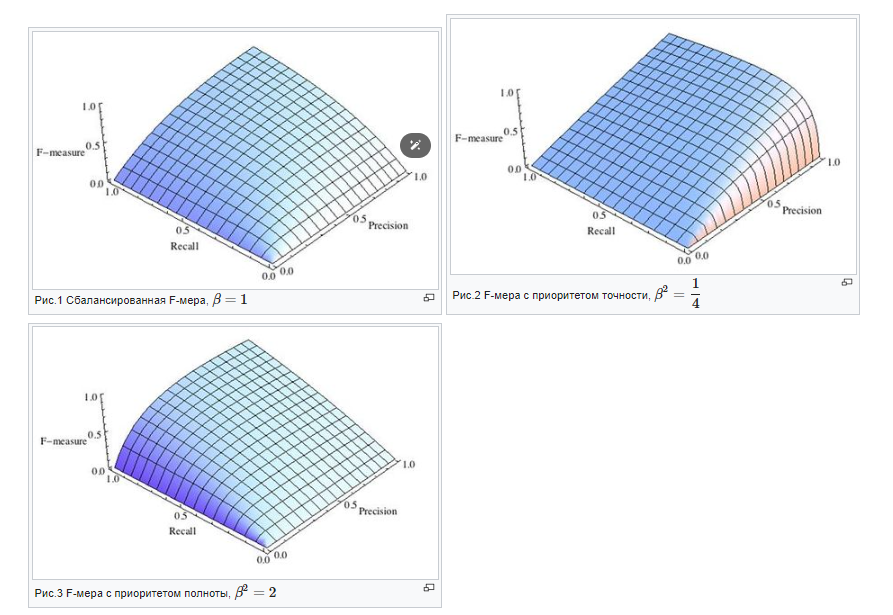

Давайте приведем конкретный числовой пример на Python для вычисления точности, полноты и F-меры в контексте задачи предсказания реакции клиента банка на звонок с предложением кредита.

Допустим, у нас есть следующие результаты классификации:

Истинные метки (истинные ответы) клиентов: [1, -1, 1, 1, -1, 1, -1, 1, 1, -1]
Предсказанные метки (ответы алгоритма) классификатора: [1, -1, 1, -1, 1, 1, -1, 1, -1, -1]
Давайте напишем код на Python для вычисления точности, полноты и F-меры:

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Истинные метки
y_true = [1, -1, 1, 1, -1, 1, -1, 1, 1, -1]

# Предсказанные метки
y_pred = [1, -1, 1, -1, 1, 1, -1, 1, -1, -1]

# Вычисление точности
precision = precision_score(y_true, y_pred, pos_label=1)

# Вычисление полноты
recall = recall_score(y_true, y_pred, pos_label=1)

# Вычисление F-меры
f1 = f1_score(y_true, y_pred, pos_label=1)

print(f"Точность: {precision:.2f}")
print(f"Полнота: {recall:.2f}")
print(f"F-мера: {f1:.2f}")

Точность: 0.80
Полнота: 0.67
F-мера: 0.73


Эти результаты говорят о качестве работы алгоритма классификации в контексте задачи предсказания реакции клиента банка на звонок с предложением кредита.

- Точность (precision) равна 0.80, что означает, что 80% клиентов, которым было сделано предложение, действительно откликнулись.
- Полнота (recall) равна 0.67, что означает, что из всех клиентов, которые готовы откликнуться на предложение, алгоритм смог идентифицировать 67%.
- F-мера (F1 score) равна 0.73, что является гармоническим средним между точностью и полнотой, и позволяет оценить баланс между этими двумя метриками.

Эти результаты позволяют сделать вывод о том, что алгоритм имеет хорошую точность, но может быть улучшен в плане полноты. F-мера предоставляет общую меру качества работы алгоритма, учитывающую и точность, и полноту.


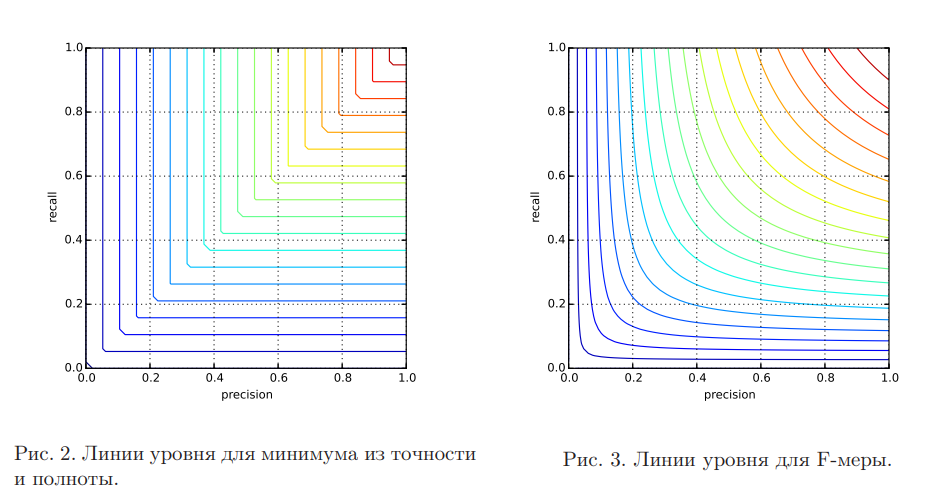

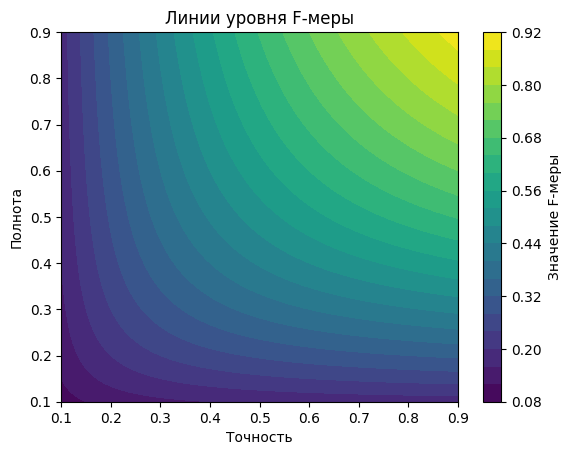

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Генерируем случайные значения точности и полноты
precision = np.linspace(0.1, 0.9, 100)
recall = np.linspace(0.1, 0.9, 100)
Precision, Recall = np.meshgrid(precision, recall)

# Вычисляем F-меру для каждой комбинации точности и полноты
F1 = 2 * Precision * Recall / (Precision + Recall)

# Строим линии уровня F-меры
plt.contourf(Precision, Recall, F1, levels=20, cmap='viridis')
plt.colorbar(label='Значение F-меры')
plt.xlabel('Точность')
plt.ylabel('Полнота')
plt.title('Линии уровня F-меры')
plt.show()

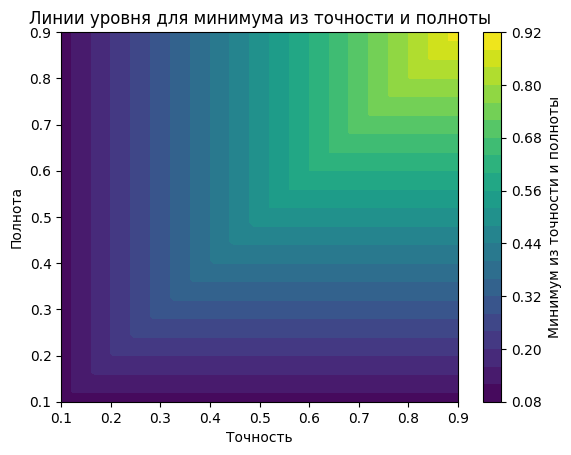

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Генерируем случайные значения точности и полноты
precision = np.linspace(0.1, 0.9, 100)
recall = np.linspace(0.1, 0.9, 100)
Precision, Recall = np.meshgrid(precision, recall)

# Вычисляем минимум из точности и полноты для каждой комбинации
min_precision_recall = np.minimum(Precision, Recall)

# Строим линии уровня минимума из точности и полноты
plt.contourf(Precision, Recall, min_precision_recall, levels=20, cmap='viridis')
plt.colorbar(label='Минимум из точности и полноты')
plt.xlabel('Точность')
plt.ylabel('Полнота')
plt.title('Линии уровня для минимума из точности и полноты')
plt.show()

###R-точность

 Другим агрегированным критерием является **R-точность**, или точка баланса (breakeven point). Она вычисляется как точность при таком $t$, при котором полнота равна точности:

$$
R-precision = \text{precision}(sign(b(x) - t^*))$$

$$t^* = \arg\min_t g(x)  \left| \text{precision}(sign(b(x) - t)) - \text{recall}(sign(b(x) - t)) \right|.
$$

Можно показать, что R-точность равна точности при таком пороге, при котором количество отнесённых к положительному классу объектов равно количеству положительных объектов в выборке.

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

# Истинные метки
y_true = [1, -1, 1, 1, -1, 1, -1, 1, 1, -1]

# Оценки алгоритма
b_scores = [0.2, 0.4, 0.5, 0.7, 0.3, 0.8, 0.6, 0.1, 0.9, 0.5]

# Находим порог t*, при котором точность и полнота равны
thresholds = np.sort(b_scores)  # сортируем оценки алгоритма
best_t = None
best_diff = np.inf
for t in thresholds:
    precision = precision_score(y_true, [1 if b >= t else -1 for b in b_scores])
    recall = recall_score(y_true, [1 if b >= t else -1 for b in b_scores])
    diff = abs(precision - recall)
    if diff < best_diff:
        best_diff = diff
        best_t = t

# Вычисляем R-точность
r_precision = precision_score(y_true, [1 if b >= best_t else -1 for b in b_scores])

print(f"R-точность: {r_precision:.2f}")

R-точность: 0.67


В этом примере мы сначала находим порог $t^*$, при котором точность и полнота равны, а затем вычисляем R-точность как точность при этом пороге.

Часто встречаются задачи, в которых целевой признак по-прежнему бинарный,
но при этом необходимо ранжировать объекты, а не просто предсказывать их класс.
Например, в задаче предсказания реакции клиента можно выдавать сортированный список,
чтобы оператор мог в первую очередь позвонить клиентам с наибольшей вероятностью
положительного отклика.
Поскольку многие алгоритмы возвращают вещественный ответ $b(x)$,
который затем бинаризуется по порогу $t$,
то можно просто сортировать объекты по значению $b(x)$.
Для измерения качества ранжирования нередко используют \emph{среднюю точность} (average precision, AP):
$$
    \text{AP}
    =
    \frac{1}{\ell_{+}}
    \sum_{k = 1}^{\ell}
        [y_{(k)} = 1] \text{precision}@k,
$$
где $y_{(k)}$ --- ответ $k$-го по порядку объекта,
$\ell_{+}$ --- число положительных объектов в выборке,
а $\text{precision}@k$ --- точность среди первых $k$ в списке объектов.
Если алгоритм $b(x)$ так ранжирует объекты, что сначала идут все положительные,
а затем все отрицательные, то средняя точность будет равна единице;
соответственно, чем сильнее положительные документы концентрируются в верхней
части списка, тем ближе к единице будет данный показатель.

In [ ]:
import numpy as np

# Истинные метки
y_true = [1, -1, 1, 1, -1, 1, -1, 1, 1, -1]

# Оценки алгоритма (вещественные значения)
#Значения b_scores представляют собой вещественные оценки, возвращаемые алгоритмом для каждого объекта.
b_scores = [0.2, 0.4, 0.5, 0.7, 0.3, 0.8, 0.6, 0.1, 0.9, 0.5]

# Сортируем объекты по убыванию оценок алгоритма
sorted_indices = np.argsort(b_scores)[::-1]
sorted_y_true = np.array(y_true)[sorted_indices]

# Вычисляем среднюю точность (average precision)
num_positive = np.sum(np.array(y_true) == 1)  # число положительных объектов
precision_at_k = np.cumsum(sorted_y_true == 1) / np.arange(1, len(sorted_y_true) + 1)
average_precision = np.sum(precision_at_k * (sorted_y_true == 1)) / num_positive

print(f"Средняя точность (AP): {average_precision:.2f}")

Средняя точность (AP): 0.80


В этом примере мы сначала сортируем объекты по убыванию оценок алгоритма, затем вычисляем среднюю точность (average precision) в соответствии с формулой выше.

### Связь точности, полноты и доли правильных ответов
Выше мы отмечали, что высокие значения доли правильных ответов вовсе не влекут
за собой высокое качество работы классификатора,
и ввели точность и полноту как способ решения этой проблемы.
Тем не менее, при выборе точности и полноты в качестве основных метрик, следует
соблюдать осторожность при выборе требований к их значениям --- как мы увидим из примера,
независимость данных метрик от соотношения классов может привести к неочевидным последствиям.

Рассмотрим задачу бинарной классификации с миллионом объектов ($\ell = 1.000.000$),
где доля объектов первого класса составляет $1\%$ ($\ell_+ = 10.000$).
Мы знаем, что доля правильных ответов будет вести себя не вполне интуитивно
на данной несбалансированной выборке, и поэтому выберем точность и полноту для измерения
качества классификаторов.
Поскольку мы хотим решить задачу хорошо, то введём требования, что и точность, и полнота
должны быть не менее $90\%$.
Эти требования кажутся вполне разумными, если забыть о соотношении классов.
Попробуем теперь оценить, какая доля правильных ответов должна быть у классификатора,
удовлетворяющего нашим требованиям.

Всего в выборке $10.000$ положительных объектов, и для достижения полноты $90\%$
мы должны отнести как минимум $9.000$ к положительному классу.
Получаем $\text{TP} = 9000$, $\text{FN} = 1000$.
Так как точность тоже должна быть не меньше $90\%$, получаем $\text{FP} = 1000$.
Отсюда получаем, что доля правильных ответов должна быть равна $(1 - 2.000/1.000.000) = 99.8\%$!
Это крайне высокий показатель, и его редко удаётся достичь на таких выборках во многих предметных областях.


##Lift.
На практике часто возникают задачи, связанные с выбором подмножества: выделение лояльных клиентов банка,
обнаружение уходящих пользователей мобильного оператора и т.д.
Заказчика может интересовать вопрос, насколько выгоднее работать с этим подмножеством
по сравнению со всем множеством.
Если при рассылке предложений о кредите клиентам из подмножества и всем клиентам
будет получаться одна и та же доля откликнувшихся, то подмножество не будет
представлять особой ценности.
Формально это измеряется с помощью **прироста концентраци** (lift),
который равен отношению точности к доле положительных объектов в выборке:
$$
    \text{lift}
    =
    \frac{
        \text{precision}
    }{
        (\text{TP} + \text{FN}) / \ell
    }.
$$
Эту величину можно интерпретировать как улучшение доли положительных объектов
в данном подмножестве относительно доли в случайно выбранном подмножестве такого же размера.

###  ROC Curve

Кривая ROC (Receiver Operating Characteristic) - это график, который используется для оценки качества бинарной классификации и позволяет визуально представить компромисс между чувствительностью (вероятность правильного обнаружения положительного класса) и специфичностью (вероятность правильного обнаружения отрицательного класса) при различных порогах классификации.

На графике ROC по оси абсцисс откладывается False Positive Rate (FPR), а по оси ординат - True Positive Rate (TPR), где:
- FPR = FP / (FP + TN) - доля ложноположительных результатов
- TPR = TP / (TP + FN) - доля истинноположительных результатов

Идеальным случаем на ROC-кривой является кривая, которая идеально поднимается вверх слева направо, затем горизонтально вправо. Это означает, что классификатор идеально различает между положительными и отрицательными случаями без ложных срабатываний или пропусков.

Чем ближе кривая ROC к верхнему левому углу, тем лучше классификатор. Площадь под кривой (Area Under the ROC Curve, AUC-ROC) является численной мерой качества классификации: чем больше AUC, тем лучше классификатор различает между положительными и отрицательными случаями.

ROC-кривая и AUC-ROC часто используются для сравнения различных моделей классификации и выбора оптимального порога классификации в зависимости от конкретных требований задачи.


Найдите истинно положительные результаты (TP), ложноположительные результаты (FP), истинно отрицательные результаты (TN), ложноотрицательные результаты (FN), частоту истинно положительных результатов (TPR) и частоту ложноположительных результатов (FPR) для заданного кортежа, фактического класса и вероятности.

В следующей таблице приведены результаты классификации 10 тестовых кортежей с использованием вероятностного классификатора. Для каждого кортежа фактический класс (P или N) указан во втором столбце, а вероятность (класса P), возвращаемая классификатором, находится в третьем столбце.


| tupleID | actual class | probability |
|---------|--------------|-------------|
| 1       | P            | 0.95        |
| 2       | N            | 0.85        |
| 3       | P            | 0.78        |
| 4       | P            | 0.66        |
| 5       | N            | 0.60        |
| 6       | P            | 0.55        |
| 7       | N            | 0.53        |
| 8       | N            | 0.52        |
| 9       | N            | 0.51        |
| 11      | P            | 0.40        |

Решение:

Для решения этой задачи, нам необходимо выполнить следующие шаги:

- Отсортировать результаты классификации по вероятности класса P в порядке убывания.
- Для каждой строки в таблице определить фактический класс (P или N) и вероятность (класса P).
- Для каждой строки вычислить TP, FP, TN, FN, TPR и FPR с использованием порогового значения вероятности для прогнозирования класса P, которое равно вероятности в данной строке.
- На основе вычисленных значений построить ROC-кривую.


| Пороговое значение | TP (True Positive) | FP (False Positive) | TPR (True Positive Rate) | FPR (False Positive Rate) |
|---------------------|---------------------|---------------------|--------------------------|--------------------------|
| 0.90                | 1                   | 0                   | 0.1                      | 0                        |
| 0.80                | 2                   | 0                   | 0.2                      | 0                        |
| 0.70                | 2                   | 1                   | 0.2                      | 0.1                      |
| 0.60                | 3                   | 1                   | 0.3                      | 0.1                      |
| 0.55                | 4                   | 1                   | 0.4                      | 0.1                      |
| 0.54                | 4                   | 2                   | 0.4                      | 0.2                      |
| 0.53                | 4                   | 3                   | 0.4                      | 0.3                      |
| 0.51                | 4                   | 4                   | 0.4                      | 0.4                      |
| 0.50                | 5                   | 4                   | 0.5                      | 0.4                      |
| 0.40                | 5                   | 5                   | 0.5                      | 0.5                      |


In [ ]:
import pandas as pd

# Создаем исходные данные
data = {
    'tupleID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 11],
    'actual_class': ['P', 'N', 'P', 'P', 'N', 'P', 'N', 'N', 'N', 'P'],
    'probability': [0.95, 0.85, 0.78, 0.66, 0.60, 0.55, 0.53, 0.52, 0.51, 0.40]
}

df = pd.DataFrame(data)

# Сортируем результаты классификации по вероятности класса P в порядке убывания
df = df.sort_values(by='probability', ascending=False)

# Инициализируем переменные
TP = 0
FP = 0
TN = 0
FN = 0

# Вычисляем TP, FP, TN, FN
for index, row in df.iterrows():
    if row['actual_class'] == 'P':
        TP += 1
    else:
        FP += 1
    TN = len(df[df['actual_class'] == 'N'])
    FN = len(df[df['actual_class'] == 'P'])

# Вычисляем TPR и FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print("TP:", TP)
print("FP:", FP)
print("TN:", TN)
print("FN:", FN)
print("TPR:", TPR)
print("FPR:", FPR)

TP: 5
FP: 5
TN: 5
FN: 5
TPR: 0.5
FPR: 0.5


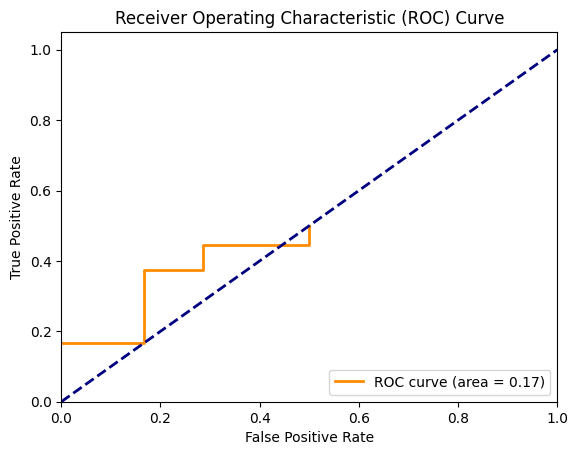

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Создаем исходные данные
data = {
    'tupleID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 11],
    'actual_class': ['P', 'N', 'P', 'P', 'N', 'P', 'N', 'N', 'N', 'P'],
    'probability': [0.95, 0.85, 0.78, 0.66, 0.60, 0.55, 0.53, 0.52, 0.51, 0.40]
}

df = pd.DataFrame(data)

# Сортируем результаты классификации по вероятности класса P в порядке убывания
df = df.sort_values(by='probability', ascending=False)

# Инициализируем переменные
TP = 0
FP = 0
TN = 0
FN = 0
TPR_list = []
FPR_list = []

# Вычисляем TP, FP, TN, FN и строим ROC-кривую
for index, row in df.iterrows():
    if row['actual_class'] == 'P':
        TP += 1
    else:
        FP += 1
    TN = len(df[df['actual_class'] == 'N'])
    FN = len(df[df['actual_class'] == 'P'])
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    TPR_list.append(TPR)
    FPR_list.append(FPR)

# Строим ROC-кривую
plt.figure()
lw = 2
plt.plot(FPR_list, TPR_list, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc(FPR_list, TPR_list))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

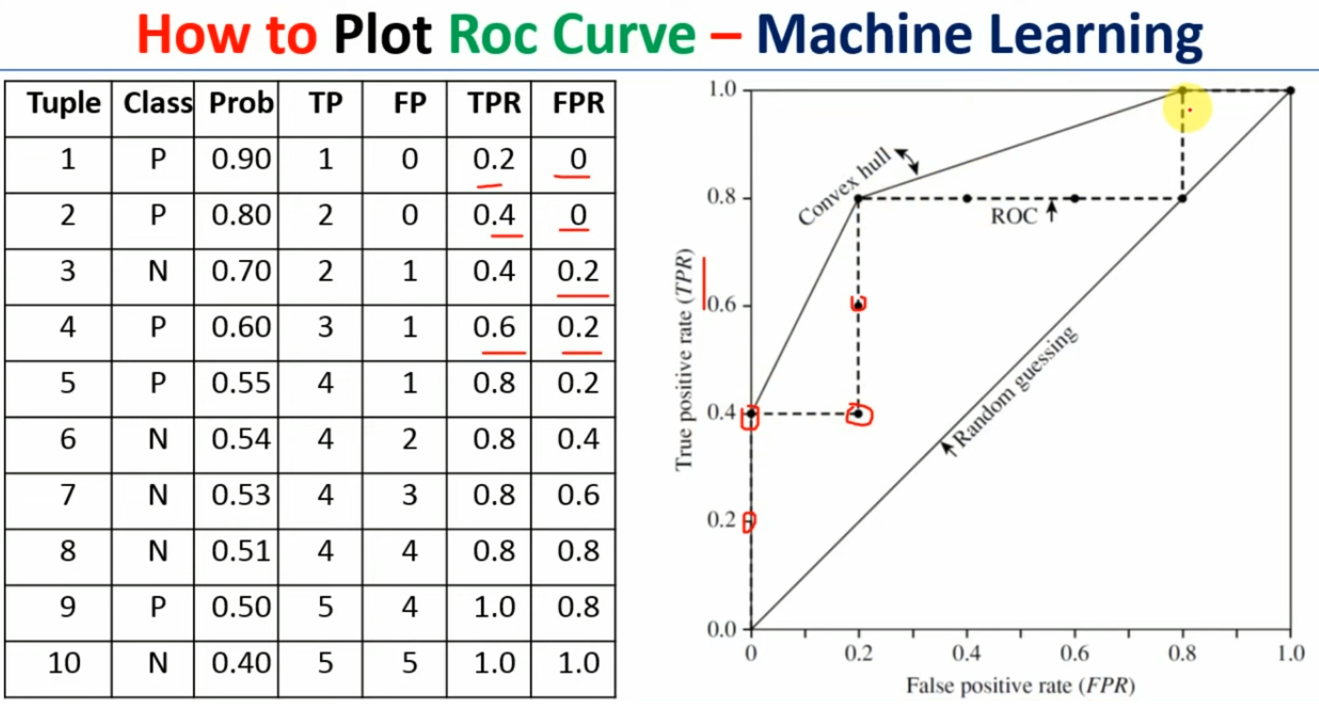

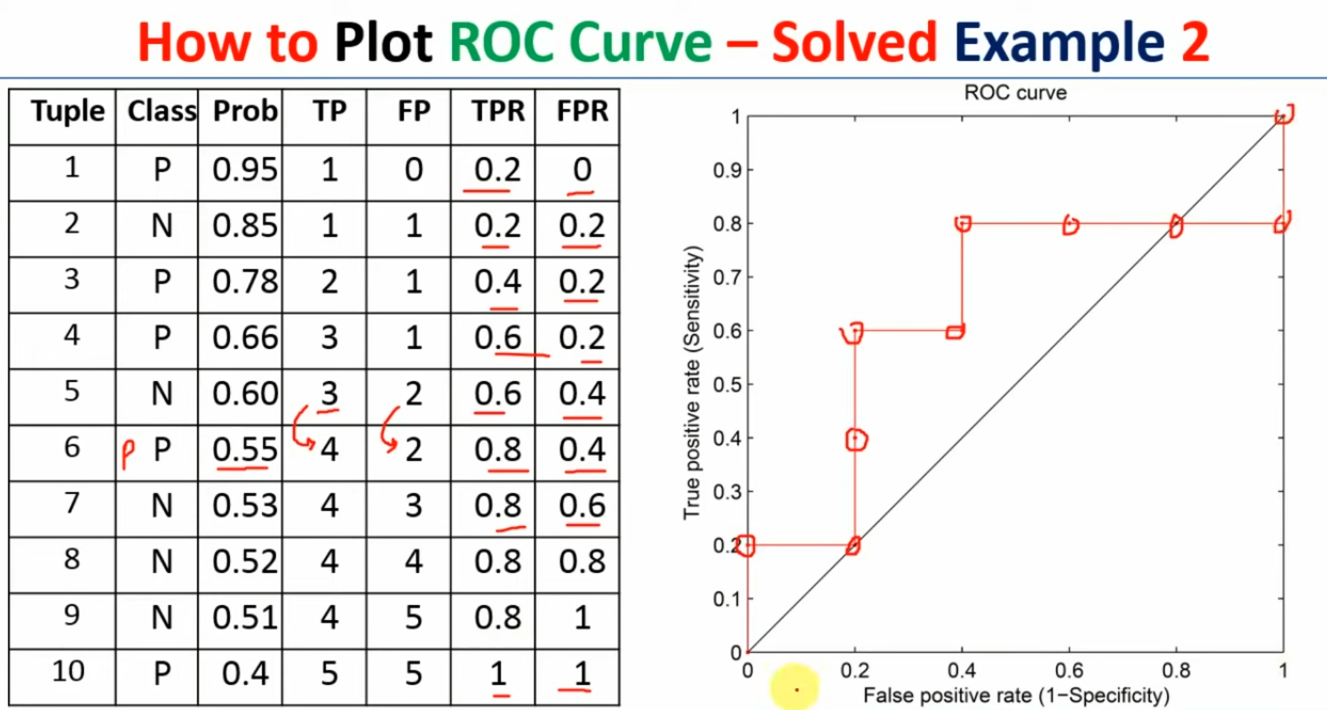

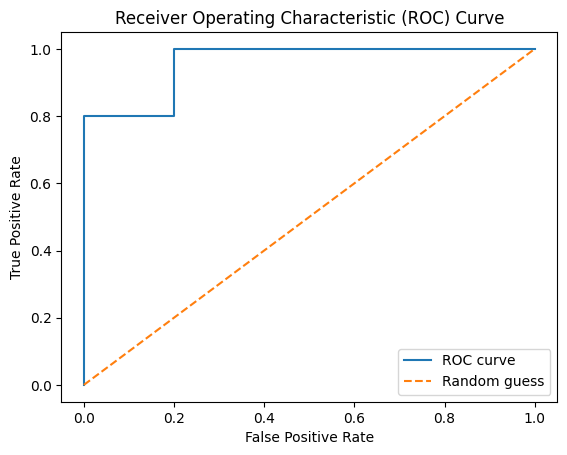

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Сгенерируем случайные метки классов и вероятности
true_labels = np.array([1, 0, 1, 1, 0, 1, 0, 1, 0, 0])
predicted_probabilities = np.array([0.8, 0.3, 0.6, 0.9, 0.2, 0.75, 0.4, 0.7, 0.5, 0.65])

# Функция для вычисления TPR и FPR
def calculate_tpr_fpr(labels, probs, threshold):
    predictions = (probs >= threshold).astype(int)
    tp = np.sum((predictions == 1) & (labels == 1))
    fp = np.sum((predictions == 1) & (labels == 0))
    tn = np.sum((predictions == 0) & (labels == 0))
    fn = np.sum((predictions == 0) & (labels == 1))
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    return tpr, fpr

# Вычисляем TPR и FPR для различных порогов
thresholds = np.linspace(0, 1, 100)
tprs = []
fprs = []
for threshold in thresholds:
    tpr, fpr = calculate_tpr_fpr(true_labels, predicted_probabilities, threshold)
    tprs.append(tpr)
    fprs.append(fpr)

# Построение кривой ROC
plt.figure()
plt.plot(fprs, tprs, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Давайте разберем этот код по шагам:

1. `import numpy as np` и `import matplotlib.pyplot as plt` - эти строки импортируют библиотеки NumPy и Matplotlib. NumPy используется для работы с массивами и выполнения математических операций, а Matplotlib - для построения графиков.

2. Мы задаем случайные метки классов и вероятности:
   - `true_labels` содержит фактические метки классов (1 - положительный класс, 0 - отрицательный класс)
   - `predicted_probabilities` содержит предсказанные вероятности принадлежности к положительному классу

3. Определяется функция `calculate_tpr_fpr`, которая принимает метки классов, предсказанные вероятности и порог в качестве входных данных. Эта функция вычисляет TPR (True Positive Rate) и FPR (False Positive Rate) на основе заданного порога.

4. Создается массив `thresholds`, содержащий 100 равномерно распределенных значений от 0 до 1. Эти значения будут использоваться в качестве порогов для вычисления TPR и FPR.

5. Происходит вычисление TPR и FPR для различных порогов:
   - Мы создаем пустые массивы `tprs` и `fprs`, куда будут сохраняться вычисленные значения TPR и FPR для каждого порога.
   - Затем мы проходим по каждому порогу из массива `thresholds` и для каждого порога вычисляем соответствующие TPR и FPR с помощью функции `calculate_tpr_fpr`, сохраняя результаты в массивы `tprs` и `fprs`.

6. Построение кривой ROC:
   - Мы создаем новый график с помощью `plt.figure()`.
   - Затем мы строим кривую ROC, используя массивы `fprs` и `tprs` в качестве координат для построения кривой.
   - Мы также добавляем пунктирную линию для случайного угадывания и метки осей и заголовок графика.
   - Наконец, функция `plt.show()` отображает построенный график.

Таким образом, этот код вычисляет TPR и FPR для различных порогов и строит кривую ROC на основе заданных меток классов и вероятностей.

###Area Under Curve
Выше мы изучили точность, полноту и F-меру, которые характеризуют
качество работы алгоритма $a(x) = sign(b(x) - t)$ при конкретном выборе порога $t$.
Однако зачастую интерес представляет лишь вещественнозначный алгоритм $b(x)$,
а порог будет выбираться позже в зависимости от требований к точности и полноте.
В таком случае возникает потребность
в измерении качества семейства моделей $\{a(x) = sign(b(x) - t) \quad  t \in R\}$.


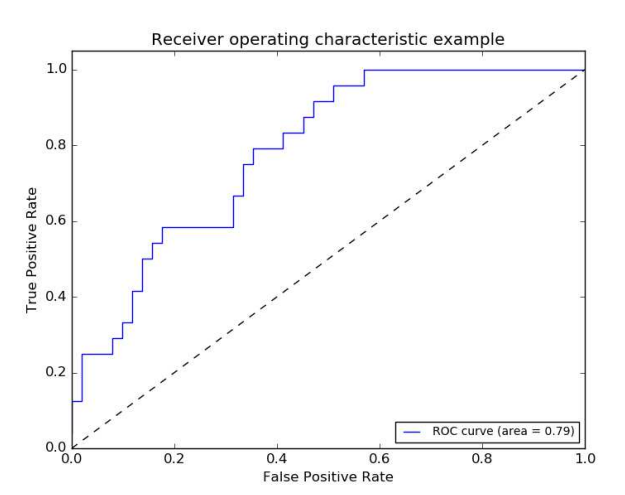



Можно измерять качество этого множества на основе качества лучшего (в некотором смысле) алгоритма.
Для этого подходит упомянутая ранее точка баланса (breakeven point).
В идеальном семействе алгоритмов она будет равна единице, поскольку найдется
алгоритм со стопроцентной точностью и полнотой.
Данная метрика, однако, основывается лишь на качестве одного алгоритма,
и не характеризует вариативность семейства.

Широко используется такая интегральная метрика качества семейства,
как **площадь под ROC-кривой** (Area Under ROC Curve, AUC-ROC).
Рассмотрим двумерное пространство, одна из координат которого соответствует
доле неверно принятых объектов (False Positive Rate, FPR),
а другая --- доле верно принятых объектов (True Positive Rate, TPR):
\begin{align*}
    &\text{FPR}
    =
    \frac{
        \text{FP}
    }{
        \text{FP} + \text{TN}
    };\\
    &\text{TPR}
    =
    \frac{
        \text{TP}
    }{
        \text{TP} + \text{FN}
    }.
\end{align*}
Каждый возможный выбор порога $t$ соответствует точке в этом пространстве.
Всего различных порогов имеется $\ell + 1$.
Максимальный порог
$t_{\max} = \max\limits_{i} b(x_i) $ даст классификатор
с $\text{TPR} = 0$, $\text{FPR} = 0$.
Минимальный порог $t_{\min} = \min\limits_{i} b(x_i) - \varepsilon$ даст $\text{TPR} = 1$
и $\text{FPR} = 1$.
ROC-кривая --- это кривая с концами в точках $(0, 0)$ и $(1, 1)$,
которая последовательно соединяет точки, соответствующие
порогам $b(x_{(1)}) - \varepsilon, b(x_{(1)}), b(x_{(2)}), \dots, b(x_{(\ell)})$ (см. рис. 4).
Площадь под данной кривой называется AUC-ROC, и принимает значения от $0$ до $1$.
Если порог $t$ может быть подобран так, что алгоритм $a(x)$ не будет допускать ошибок,
то AUC-ROC будет равен единице;
если же $b(x)$ ранжирует объекты случайным образом, то AUC-ROC будет близок к $0.5$.


Критерий AUC-ROC имеет большое число интерпретаций --- например,
он равен вероятности того, что для случайно выбранных
положительного объекта $x_+$ и отрицательного объекта $x_-$
будет выполнено\footnote{При условии, что прогнозы на всех объектах выборки попарно различны.} $b(x_+) > b(x_-)$.


### Индекс Джини.
В задачах кредитного скоринга вместо AUC-ROC часто используется пропорциональная
метрика, называемая индексом Джини (Gini index):
$$
    \text{Gini}
    =
    2 \text{AUC} - 1.
$$
По сути это умноженная на два площадь между ROC-кривой и диагональю, соединяющей точки $(0, 0)$ и $(1, 1)$.

Отметим, что переход от AUC к индексу Джини приводит к увеличению относительных разниц.
Если мы смогли улучшить AUC с $0.8$ до $0.9$, то это соответствует
относительному улучшению в $12.5\%$.
В то же время соответствующие индексы Джини были улучшены с $0.6$ до $0.8$,
то есть на $33.3\%$ --- относительное улучшение повысилось почти в три раза!



### Чувствительность к соотношению классов.
Рассмотрим задачу выделения математических статей из множества научных статей.
Допустим, что всего имеется $1.000.100$ статей, из которых лишь $100$ относятся к математике.
Если нам удастся построить алгоритм $a(x)$, идеально решающий задачу,
то его TPR будет равен единице, а FPR --- нулю.
Рассмотрим теперь плохой алгоритм, дающий положительный ответ на $95$ математических
и $50.000$ нематематических статьях.
Такой алгоритм совершенно бесполезен, но при этом имеет $\text{TPR} = 0.95$
и $\text{FPR} = 0.05$, что крайне близко к показателям идеального алгоритма.

Таким образом, если положительный класс существенно меньше по размеру,
то AUC-ROC может давать неадекватную оценку качества работы алгоритма,
поскольку измеряет долю неверно принятых объектов относительно
общего числа отрицательных.
Так, алгоритм $b(x)$, помещающий $100$ релевантных документов
на позиции с $50.001$-й по $50.101$-ю, будет иметь AUC-ROC $0.95$.



### Precison-recall кривая.
Избавиться от указанной проблемы с несбалансированными классами можно,
перейдя от ROC-кривой к Precision-Recall кривой.
Она определяется аналогично ROC-кривой, только по осям
откладываются не FPR и TPR, а полнота (по оси абсцисс) и точность (по оси ординат).
Критерием качества семейства алгоритмов выступает площадь под PR-кривой (AUC-PR).
Данную величину можно аппроксимировать следующим образом.
Стартуем из точки $(0, 1)$.
Будем идти по ранжированной выборке, начиная с первого объекта;
пусть текущий объект находится на позиции $k$.
Если он относится к классу <<$-1$>>,
то полнота не меняется, точность падает --- соответственно, кривая опускается строго вниз.
Если же объект относится к классу <<$1$>>,
то полнота увеличивается на $1/\ell_{+}$, точность растет, и кривая поднимается вправо и вверх.
Площадь под этим участком можно аппроксимировать площадью прямоугольника
с высотой, равной $\text{precision}@k$ и шириной $1/\ell_{+}$.
При таком способе подсчета площадь под PR-кривой будет совпадать со средней точностью:
$$
    \text{AUC-PR}
    =
    \frac{1}{\ell_{+}}
    \sum_{k = 1}^{\ell}
        [y_k = 1]
        \text{precision}@k.
$$

Отметим, что AUC-PR дает разумные результаты в рассмотренном выше примере с классификацией статей.
Так, при размещении $100$ релевантных документов на позициях $50.001$-$50.101$ в ранжированном списке,
AUC-PR будет равен 0.001.

Несмотря на указанные различия, между ROC- и PR-кривой имеется тесная связь.
Так, можно показать, что если ROC-кривая одного алгоритма лежит полностью над
ROC-кривой другого алгоритма, то и PR-кривая одного лежит над PR-кривой другого